In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200411.txt', index_col = 0)

In [ ]:
del df['DESC']

del df['DIVISION']


In [ ]:
df['NET_ENTRIES'] = df.ENTRIES.diff()

df.columns = df.columns.str.strip()

df['NET_EXITS'] = df.EXITS.diff()


In [ ]:
from datetime import datetime

df['Hourval'] = df.TIME.str.slice(0, 2).astype(int)


In [ ]:
df = df[(df.Hourval >= 6) & (df.Hourval<=18)]

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.strftime('%a')
df.head()


In [8]:
df.loc[(df['SCP'] != df['SCP'].shift()) | (df['ENTRIES'] < df['ENTRIES'].shift()), 'NET_ENTRIES'] = 0
df.loc[(df['SCP'] != df['SCP'].shift()) | (df['EXITS'] < df['EXITS'].shift()), 'NET_EXITS'] = 0
df.head()

,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,Hourval,DAY
C/A,,,,,,,,,,,,
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,08:00:00,7413511,2516935,0.0,0.0,8,Sat
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,12:00:00,7413521,2516944,10.0,9.0,12,Sat
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,16:00:00,7413541,2516953,20.0,9.0,16,Sat
A002,R051,02-00-00,59 ST,NQR456W,2020-04-05,08:00:00,7413591,2516973,6.0,5.0,8,Sun
A002,R051,02-00-00,59 ST,NQR456W,2020-04-05,12:00:00,7413597,2516983,6.0,10.0,12,Sun


In [9]:
df[(df.NET_ENTRIES < 0) | (df.NET_EXITS < 0)]
df[(df.NET_ENTRIES == 0) | (df.NET_EXITS == 0)]

,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,Hourval,DAY
C/A,,,,,,,,,,,,
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,08:00:00,7413511,2516935,0.0,0.0,8,Sat
A002,R051,02-00-01,59 ST,NQR456W,2020-04-04,08:00:00,6589707,1483470,0.0,0.0,8,Sat
A002,R051,02-03-00,59 ST,NQR456W,2020-04-04,08:00:00,1376413,5179695,0.0,0.0,8,Sat
A002,R051,02-03-00,59 ST,NQR456W,2020-04-06,08:00:00,1376450,5179880,0.0,34.0,8,Mon
A002,R051,02-03-00,59 ST,NQR456W,2020-04-07,08:00:00,1376468,5180021,0.0,45.0,8,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2020-04-09,13:00:00,5554,514,0.0,0.0,13,Thu
TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2020-04-09,17:00:00,5554,514,0.0,0.0,17,Thu
TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,2020-04-10,09:00:00,5554,514,0.0,0.0,9,Fri


In [21]:
df['TOTAL_TRAFFIC'] = df['NET_ENTRIES'] + df['NET_EXITS']

In [11]:
df['DAILY_TOTAL'] = df.groupby(['STATION','DATE'])['TOTAL_TRAFFIC'].transform('sum')
df.head()

,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,Hourval,DAY,TOTAL_TRAFFIC,DAILY_TOTAL
C/A,,,,,,,,,,,,,,
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,08:00:00,7413511,2516935,0.0,0.0,8,Sat,0.0,2900.0
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,12:00:00,7413521,2516944,10.0,9.0,12,Sat,19.0,2900.0
A002,R051,02-00-00,59 ST,NQR456W,2020-04-04,16:00:00,7413541,2516953,20.0,9.0,16,Sat,29.0,2900.0
A002,R051,02-00-00,59 ST,NQR456W,2020-04-05,08:00:00,7413591,2516973,6.0,5.0,8,Sun,11.0,3415.0
A002,R051,02-00-00,59 ST,NQR456W,2020-04-05,12:00:00,7413597,2516983,6.0,10.0,12,Sun,16.0,3415.0


In [12]:
dfDaily = df[['STATION','DATE','DAY','DAILY_TOTAL']].sort_values(by='DAILY_TOTAL', ascending=False).drop_duplicates()
dfDaily

,STATION,DATE,DAY,DAILY_TOTAL
C/A,,,,
R305,125 ST,2020-04-06,Mon,15981.0
R174,125 ST,2020-04-08,Wed,15703.0
R304,125 ST,2020-04-07,Tue,15701.0
N026,125 ST,2020-04-10,Fri,15650.0
N026,125 ST,2020-04-09,Thu,14888.0
...,...,...,...,...
N181A,AQUEDUCT RACETR,2020-04-07,Tue,5.0
N181A,AQUEDUCT RACETR,2020-04-05,Sun,4.0
R301,CENTRAL PK N110,2020-04-04,Sat,3.0


In [25]:
dfDaily = df[['STATION','DATE','DAY','DAILY_TOTAL']].sort_values(by='DAILY_TOTAL', ascending=False).drop_duplicates()
dfDaily

,STATION,DATE,DAY,DAILY_TOTAL
C/A,,,,
R305,125 ST,2020-04-06,Mon,15981.0
R174,125 ST,2020-04-08,Wed,15703.0
R304,125 ST,2020-04-07,Tue,15701.0
N026,125 ST,2020-04-10,Fri,15650.0
N026,125 ST,2020-04-09,Thu,14888.0
...,...,...,...,...
N181A,AQUEDUCT RACETR,2020-04-07,Tue,5.0
N181A,AQUEDUCT RACETR,2020-04-05,Sun,4.0
R301,CENTRAL PK N110,2020-04-04,Sat,3.0


In [40]:
dfDaily.groupby(['STATION']).max().sort_values(by='DAILY_TOTAL', ascending= False ).head(50)


,DATE,DAY,DAILY_TOTAL
STATION,,,
125 ST,2020-04-10,Wed,15981.0
34 ST-PENN STA,2020-04-10,Wed,11962.0
14 ST-UNION SQ,2020-04-10,Wed,10056.0
86 ST,2020-04-10,Wed,9010.0
GRD CNTRL-42 ST,2020-04-10,Wed,8430.0
96 ST,2020-04-10,Wed,8082.0
42 ST-PORT AUTH,2020-04-10,Wed,7504.0
23 ST,2020-04-10,Wed,7291.0
FULTON ST,2020-04-10,Wed,7093.0


In [38]:
df['WEEKLY_TOTAL'] = df.groupby(['STATION'])['TOTAL_TRAFFIC'].transform('sum')

In [16]:
df.to_csv (r'temp2.csv', index = False, header=True)


In [17]:
dfDaily.to_csv (r'temp3.csv', index = False, header=True)


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

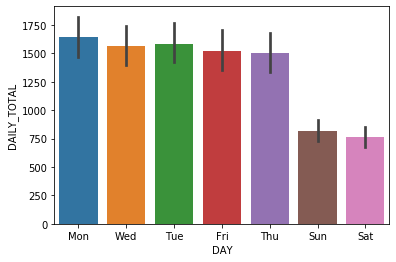

In [19]:
sns.barplot(x = 'DAY',y='DAILY_TOTAL',data=dfDaily);

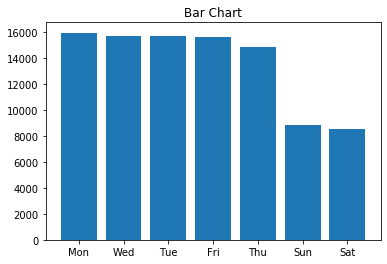

In [30]:

new_X = dfDaily[(dfDaily.STATION == "125 ST")].DAY
new_Y = dfDaily[(dfDaily.STATION == "125 ST")].DAILY_TOTAL

plt.title('Bar Chart')
plt.bar(new_X,new_Y);

In [ ]:
df.to_csv (r'temp5.csv', index = False, header=True)